In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")


In [5]:
#Setup automap
Base = automap_base()

In [6]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [7]:
# View all of the classes that automap found


In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
Measurement.__dict__

mappingproxy({'__table__': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None),
              '__module__': 'sqlalchemy.ext.automap',
              '__doc__': None,
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.measurement'> at 1b421660150>,
              '__init__': <function __init__(self, **kwargs)>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1b4216603b8>,
              'station': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1b421660468>,
              'date': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1b4216604c0>,
              'prcp': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1b421660518>,
              'tobs': <sqlalc

In [11]:
for row in session.query(Measurement, Measurement.date).order_by(desc('date')).limit(1).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x000001B421657FD0>, '2017-08-23')


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
#most_recent = session.query(Measurement).order_by(desc('date')).first()
#most_recent

for row in session.query(Measurement, Measurement.date).order_by(desc('date')).limit(1).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x000001B421657FD0>, '2017-08-23')


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent = dt.datetime(2017, 8, 23)
most_recent

# Calculate the date one year from the last date in data set.
one_year_prev = (most_recent - pd.DateOffset(months=12))
#one_year_prev

# Perform a query to retrieve the data and precipitation scores
session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").all()


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [29]:
# Save the query results as a Pandas DataFrame and set the index to the date column
query_df = pd.read_sql(session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").statement, session.bind)

# Sort the dataframe by date
query_df.sort_values(by=['date'], inplace=True, ascending=False)
query_df.head()


,date,prcp
2229,2017-08-23,0.45
1528,2017-08-23,0.08
1008,2017-08-23,0.00
360,2017-08-23,0.00
1527,2017-08-22,0.00


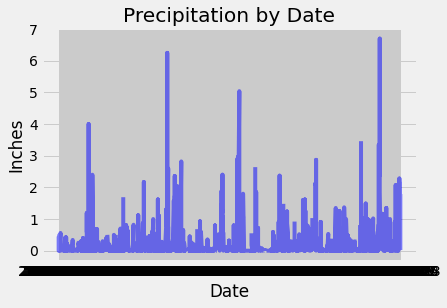

In [30]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(query_df['date'], query_df['prcp'], color='b', alpha=0.5)
plt.title('Precipitation by Date')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data
query_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [60]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).distinct().count()

19550

In [54]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_list = []

for entry in session.query(Measurement.station).distinct().all():
    station_list.append(entry)
station_list

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [63]:
print('USC00519397', session.query(Measurement.station).filter(Measurement.station == 'USC00519397').count())
print('USC00513117', session.query(Measurement.station).filter(Measurement.station == 'USC00513117').count())
print('USC00514830', session.query(Measurement.station).filter(Measurement.station == 'USC00514830').count())
print('USC00517948', session.query(Measurement.station).filter(Measurement.station == 'USC00517948').count())
print('USC00518838', session.query(Measurement.station).filter(Measurement.station == 'USC00518838').count())
print('USC00519523', session.query(Measurement.station).filter(Measurement.station == 'USC00519523').count())
print('USC00519281', session.query(Measurement.station).filter(Measurement.station == 'USC00519281').count())
print('USC00511918', session.query(Measurement.station).filter(Measurement.station == 'USC00511918').count())
print('USC00516128', session.query(Measurement.station).filter(Measurement.station == 'USC00516128').count())

USC00519397 2724
USC00513117 2709
USC00514830 2202
USC00517948 1372
USC00518838 511
USC00519523 2669
USC00519281 2772
USC00511918 1979
USC00516128 2612


In [79]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
print('Station: USC00519281 ', 
      'Low Temp: ', session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all(),
      'Max Temp: ', session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all(),
      'Avg Temp: ', session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all())


Station: USC00519281  Low Temp:  [(54.0,)] Max Temp:  [(85.0,)] Avg Temp:  [(71.66378066378067,)]


In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [21]:
# Close Session
session.close()